# Data Validations:
I am loading recipe traffic dataset and display basic info

In [3]:
#We will import data and check first 10 rows and information about dtypes .
import pandas as pd
df = pd.read_csv('recipe_site_traffic_2212 (2).csv')
print(df.head(10))
print(df.info())

   recipe  calories  carbohydrate  sugar  protein        category servings  \
0       1       NaN           NaN    NaN      NaN            Pork        6   
1       2     35.48         38.56   0.66     0.92          Potato        4   
2       3    914.28         42.68   3.09     2.88       Breakfast        1   
3       4     97.03         30.56  38.63     0.02       Beverages        4   
4       5     27.05          1.85   0.80     0.53       Beverages        4   
5       6    691.15          3.46   1.65    53.93   One Dish Meal        2   
6       7    183.94         47.95   9.75    46.71  Chicken Breast        4   
7       8    299.14          3.17   0.40    32.40    Lunch/Snacks        4   
8       9    538.52          3.78   3.37     3.79            Pork        6   
9      10    248.28         48.54   3.99   113.85         Chicken        2   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
5         High  
6          NaN  
7    

 Recipe column


In [4]:
print(df['recipe'].nunique())
print(df['recipe'].isna().sum())

947
0


As we can see above recipe column has no missing values and no duplicates so we don't do anything to this column

**Calories,Carbohydrate,Sugar and Protein columns**

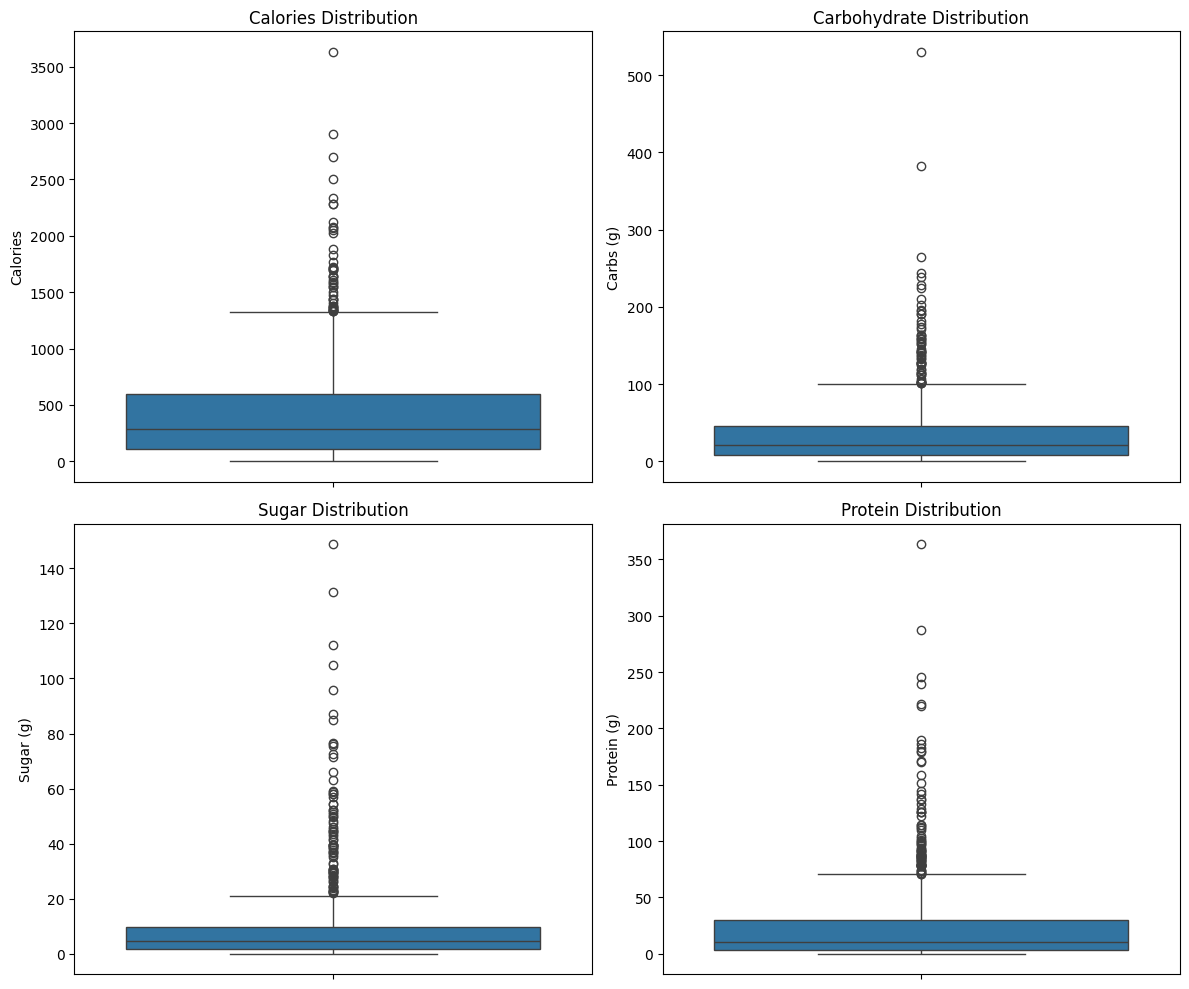

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the 2x2 subplot grid
plt.figure(figsize=(12, 10))

# 1. Calories distribution
plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='calories')
plt.title('Calories Distribution')
plt.ylabel('Calories')

# 2. Carbohydrate distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='carbohydrate')
plt.title('Carbohydrate Distribution')
plt.ylabel('Carbs (g)')

# 3. Sugar distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='sugar')
plt.title('Sugar Distribution')
plt.ylabel('Sugar (g)')

# 4. Protein distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='protein')
plt.title('Protein Distribution')
plt.ylabel('Protein (g)')

# Adjust layout and display
plt.tight_layout()
plt.show()


We fill missing values in calories,sugar,protein,carbohydrate columns with their medians because they are not normally distributed

In [6]:
columns_to_fill = ['calories','sugar','protein','carbohydrate']
for col in columns_to_fill:
  df[col]=df[col].fillna(df[col].median())
#Now we will make sure that there is no missing values left .
print(df.isna().sum())

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64


**Servings column**

In [7]:
print(df['servings'].unique())
df['servings']=df['servings'].str.replace('as a snack','').astype(int)
print(df['servings'].unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']
[6 4 1 2]



Original values contain text like '4 as a snack' which we remove before converting it to integers

**High_traffic column**

In [8]:
print(df['high_traffic'].unique()) # we have 'High' and NaN values
df['high_traffic']=df['high_traffic'].fillna(0).replace({'High':1}).astype(int)
print(df['high_traffic'].unique())

['High' nan]
[1 0]


<ipython-input-8-0540d1354376>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['high_traffic']=df['high_traffic'].fillna(0).replace({'High':1}).astype(int)


Original values 'High' (popular) and NaN (not popular) we transform it to 1 for High traffic and 0 for all others


**Category column**

In [9]:
print('Unique categories', df['category'].unique()) #First, see column
print('Value counts', df['category'].value_counts())
df = pd.get_dummies(df,columns=['category'],dtype=int,drop_first=True)
df.head()

Unique categories ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Value counts category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64


,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1,288.55,21.48,4.55,10.80,6,1,0,0,0,0,0,0,0,1,0,0
1,2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,0,1,0,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,1,0,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0,0,0


No missing values found , no natural ordinal relationship exists we use OneHot ecnoding and visualize after onehot encoding


# Exploratory Analysis:

<ipython-input-10-51d6c4806e08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='high_traffic', data=df, palette="coolwarm", edgecolor="black")


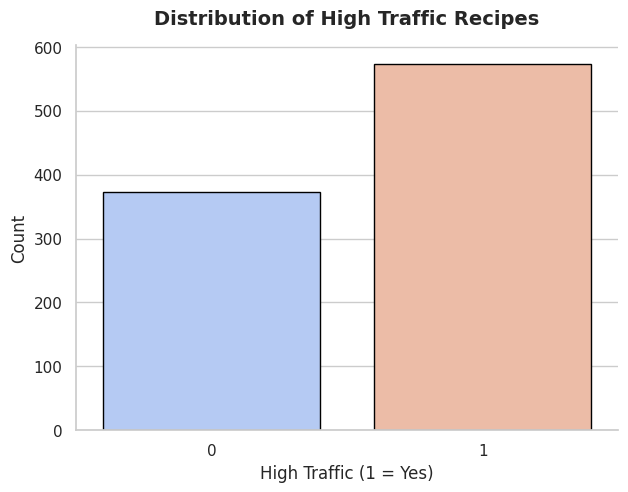

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x='high_traffic', data=df, palette="coolwarm", edgecolor="black")
plt.title('Distribution of High Traffic Recipes', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('High Traffic (1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.show()


The plot shows a slight imbalance between high traffic and not high traffic important for model evaluation

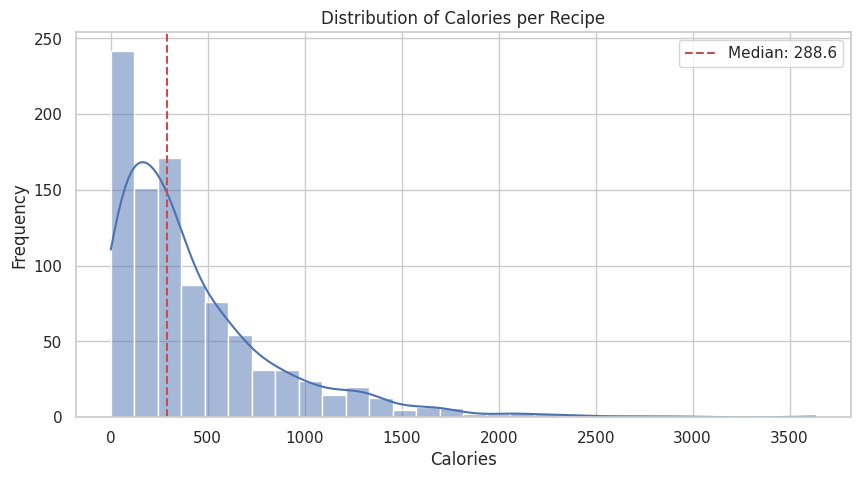

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories per Recipe')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.axvline(df['calories'].median(), color='r', linestyle='--', label=f'Median: {df["calories"].median():.1f}')
plt.legend()
plt.show()

The calories distribution is right-skewed with most recipes between 100-800 calories

<ipython-input-12-b28f621fd8aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='high_traffic', y='protein', data=df, palette="coolwarm", width=0.5, linewidth=2, fliersize=3)


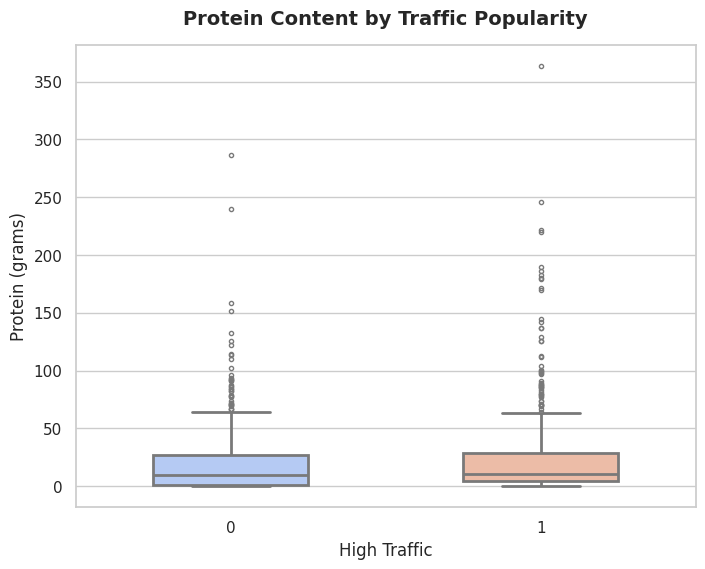

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='high_traffic', y='protein', data=df, palette="coolwarm", width=0.5, linewidth=2, fliersize=3)
plt.title('Protein Content by Traffic Popularity', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('High Traffic', fontsize=12)
plt.ylabel('Protein (grams)', fontsize=12)
plt.show()

High traffic recipes tend to have higher median protein content than not high recipes

<Figure size 1000x600 with 0 Axes>

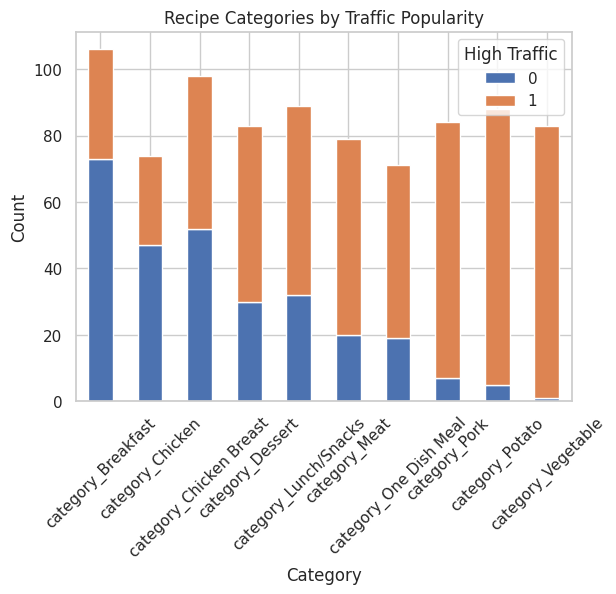

In [13]:
category_cols = [col for col in df.columns if 'category_' in col]
category_traffic = df.groupby('high_traffic')[category_cols].sum().T

plt.figure(figsize=(10, 6))
category_traffic.plot(kind='bar', stacked=True)
plt.title('Recipe Categories by Traffic Popularity')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='High Traffic')
plt.show()

Pork and Meat categories show higher proportions of hihg recipes compared to Chicken and Beverages

# Model Development:
Our dataset is ready for model development . Goal _Predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes _ . Primary metric: Recall (target >80% for high traffic recipes) and secondary metric: Precision (minimize unpopular recipe recommendation) .

* Base model : LogisticRegression
* Comparison model : RandomForestClassifier

**LogisticRegression**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score
from sklearn.model_selection import GridSearchCV
X=df.drop(['recipe','high_traffic'],axis=1)
y=df['high_traffic']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('Recall for Logistic regression:',recall_score(y_pred_lr,y_test))
print('Precison for Logistic regression:',precision_score(y_pred_lr,y_test))


Recall for Logistic regression: 0.8461538461538461
Precison for Logistic regression: 0.7652173913043478


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall 84.5%: The model correctly finds** 84.5%** of all popular recipes which meets our business requirement Precision 75.7%: It is correct 75.7% of the time helps to minimze unpopular recommendations . Our base model is giving very good results without hyperparameter tuning

**HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION**

In [15]:
lr_param_grid = {
    'penalty': ['l1', 'l2'],           # Regularization type
    'C': [0.01, 0.1, 1, 10],           # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Algorithms for optimization
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

lr = LogisticRegression(random_state=42, max_iter=1000)

lr_grid_search = GridSearchCV(
    lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print('\nOptimized Logistic Regression:')
print(f'Best Parameters: {lr_grid_search.best_params_}')
print(f'Test Recall: {recall_score(y_test, y_pred_lr):.2f}')
print(f'Test Precision: {precision_score(y_test, y_pred_lr):.2f}')


Optimized Logistic Regression:
Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Test Recall: 0.76
Test Precision: 0.85


It did not improve our metrics so we keep simple LogisticRegression as a baseline model

**RandomForestClassifier**

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Recall for Random Forest:',recall_score(y_pred_rf,y_test))
print('Precison for Random Forest:',precision_score(y_pred_rf,y_test))

Recall for Random Forest: 0.8118811881188119
Precison for Random Forest: 0.7130434782608696


Our RandomForestClassifier is not doing well compared to baseline model


**RandomForestClassifier with Hyperparameter tuning**

In [17]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced', {0:1, 1:2}]
}
rf = RandomForestClassifier(random_state=42, bootstrap=True)
rf_grid_search = GridSearchCV(
    rf,
    rf_param_grid,
    cv=5,
    scoring='f1',  # Use custom scorer
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2}],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [18]:
best_rf = rf_grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f'Test Recall: {recall_score(y_test, y_pred):.2f}')
print(f'Test Precision: {precision_score(y_test, y_pred):.2f}')

Test Recall: 0.87
Test Precision: 0.77


# Model Evaluation


Recall 87%: Exceeds 80% target and successfully finds most popular recipes Precision 77%: Accuracy helps minimize showing unpopular recipes . Our model improved Recall by 6% and precision by **6% **

# Business metrics :

* Our model identifies 87% of popular recipes (exceeding 80% target)
* For every 10 recommendations, 7-8 drive significant traffic increases

# Recommendations:

* I recommend phased implementation to validate real-world impact
* Add seasonal indicators (holiday recipes)
* Increase size of dataset
* Track user clicks on recommended recipes
* Retrain monthly with new data